In [32]:
import pandas as pd

In [33]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [34]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [35]:
# считаем все-все данные

In [89]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [90]:
train.shape

(15223, 52)

In [92]:
train.groupby('TARGET').count()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
TARGET,,,,,,,,,,,,,,,,,,,,,
0,13411,13411,13411,13411,13411,13411,13411,13411,13411,12094,...,13411,13411,13411,13411,13411,13411,13411,13411,13411,203
1,1812,1812,1812,1812,1812,1812,1812,1812,1812,1762,...,1812,1812,1812,1812,1812,1812,1812,1812,1812,85


In [38]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [39]:
test.shape

(14910, 51)

In [40]:
# отделим таргет от TRAIN-а

In [41]:
y = train['TARGET']

In [42]:
train = train.drop('TARGET', axis=1)

In [43]:
# соеденим train и test

In [44]:
all_data = pd.concat([train, test])

In [45]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [46]:
# посмотрим типы данных и их заполняемость

In [47]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [48]:
# Видим, что часть данных - object, скорее всего строки.
# Давайте выведем эти значения для каждого столбца

In [49]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
       # print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        #print() # выводим пустую строку

{'Среднее специальное', 'Неполное среднее', 'Высшее', 'Ученая степень', 'Два и более высших образования', 'Неоконченное высшее', 'Среднее'}
{'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке'}
{nan, 'Ресторанный бизнес/Общественное питание', 'Наука', 'Маркетинг', 'Подбор персонала', 'Информационные услуги', 'ЧОП/Детективная д-ть', 'Юридические услуги/нотариальные услуги', 'Транспорт', 'Строительство', 'Салоны красоты и здоровья', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'Торговля', 'Туризм', 'Государственная служба', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Развлечения/Искусство', 'Логистика', 'Сборочные производства', 'Образование', 'Сельское хозяйство', 'Другие сферы', 'Нефтегазовая промышленность', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Банк/Финансы', 'Информационные технологии'}
{nan, 'Рабочий', 'Работник сферы услуг', 'Высококвалиф

In [50]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [51]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [52]:
# причина же что использовалась запятая для разделения не целой части числа

In [53]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [54]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [55]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Среднее специальное', 'Неполное среднее', 'Высшее', 'Ученая степень', 'Два и более высших образования', 'Неоконченное высшее', 'Среднее'}

MARITAL_STATUS
{'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке'}

GEN_INDUSTRY
{nan, 'Ресторанный бизнес/Общественное питание', 'Наука', 'Маркетинг', 'Подбор персонала', 'Информационные услуги', 'ЧОП/Детективная д-ть', 'Юридические услуги/нотариальные услуги', 'Транспорт', 'Строительство', 'Салоны красоты и здоровья', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'Торговля', 'Туризм', 'Государственная служба', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Развлечения/Искусство', 'Логистика', 'Сборочные производства', 'Образование', 'Сельское хозяйство', 'Другие сферы', 'Нефтегазовая промышленность', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Банк/Финансы', 'Информационные технологии'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [56]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)

all_data.WORK_TIME[all_data.WORK_TIME.isnull()] = all_data.WORK_TIME.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [57]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i)

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM


In [58]:
# Как поступить со строковыми переменными?

# Ваш код :-)
all_data = all_data.drop(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM','PREVIOUS_CARD_NUM_UTILIZED','REG_FACT_FL','FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL'], axis=1)

In [59]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 32 columns):
AGREEMENT_RK         30133 non-null int64
AGE                  30133 non-null int64
SOCSTATUS_WORK_FL    30133 non-null int64
SOCSTATUS_PENS_FL    30133 non-null int64
GENDER               30133 non-null int64
CHILD_TOTAL          30133 non-null int64
DEPENDANTS           30133 non-null int64
PERSONAL_INCOME      30133 non-null float64
FL_PRESENCE_FL       30133 non-null int64
OWN_AUTO             30133 non-null int64
AUTO_RUS_FL          30133 non-null int64
HS_PRESENCE_FL       30133 non-null int64
COT_PRESENCE_FL      30133 non-null int64
GAR_PRESENCE_FL      30133 non-null int64
LAND_PRESENCE_FL     30133 non-null int64
CREDIT               30133 non-null float64
TERM                 30133 non-null int64
FST_PAYMENT          30133 non-null float64
DL_DOCUMENT_FL       30133 non-null int64
GPF_DOCUMENT_FL      30133 non-null int64
FACT_LIVING_TERM     30133 non-null int64
WOR

In [60]:
# В итоге должны получиться данные без пропусков и только числовые

In [61]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train1 = train['AGREEMENT_RK'].tolist()
train_new = all_data[all_data['AGREEMENT_RK'].isin(train1)]
train_new = train_new.drop('AGREEMENT_RK', axis=1)

In [62]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 0 to 15222
Data columns (total 31 columns):
AGE                  15223 non-null int64
SOCSTATUS_WORK_FL    15223 non-null int64
SOCSTATUS_PENS_FL    15223 non-null int64
GENDER               15223 non-null int64
CHILD_TOTAL          15223 non-null int64
DEPENDANTS           15223 non-null int64
PERSONAL_INCOME      15223 non-null float64
FL_PRESENCE_FL       15223 non-null int64
OWN_AUTO             15223 non-null int64
AUTO_RUS_FL          15223 non-null int64
HS_PRESENCE_FL       15223 non-null int64
COT_PRESENCE_FL      15223 non-null int64
GAR_PRESENCE_FL      15223 non-null int64
LAND_PRESENCE_FL     15223 non-null int64
CREDIT               15223 non-null float64
TERM                 15223 non-null int64
FST_PAYMENT          15223 non-null float64
DL_DOCUMENT_FL       15223 non-null int64
GPF_DOCUMENT_FL      15223 non-null int64
FACT_LIVING_TERM     15223 non-null int64
WORK_TIME            15223 non-null float64
F

In [63]:
test1 = test['AGREEMENT_RK'].tolist()
test_new = all_data[all_data['AGREEMENT_RK'].isin(test1)]
test_new = test_new.drop('AGREEMENT_RK', axis=1)

In [64]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 15223 to 30132
Data columns (total 31 columns):
AGE                  14910 non-null int64
SOCSTATUS_WORK_FL    14910 non-null int64
SOCSTATUS_PENS_FL    14910 non-null int64
GENDER               14910 non-null int64
CHILD_TOTAL          14910 non-null int64
DEPENDANTS           14910 non-null int64
PERSONAL_INCOME      14910 non-null float64
FL_PRESENCE_FL       14910 non-null int64
OWN_AUTO             14910 non-null int64
AUTO_RUS_FL          14910 non-null int64
HS_PRESENCE_FL       14910 non-null int64
COT_PRESENCE_FL      14910 non-null int64
GAR_PRESENCE_FL      14910 non-null int64
LAND_PRESENCE_FL     14910 non-null int64
CREDIT               14910 non-null float64
TERM                 14910 non-null int64
FST_PAYMENT          14910 non-null float64
DL_DOCUMENT_FL       14910 non-null int64
GPF_DOCUMENT_FL      14910 non-null int64
FACT_LIVING_TERM     14910 non-null int64
WORK_TIME            14910 non-null float

In [65]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new, y, test_size=0.3, random_state=42)
# test_size=0.3, random_state=42

# Ваш код :-)


In [67]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)


In [73]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

precision1 = precision_score(y_test, predict)
recall1 = recall_score(y_test, predict)
accuracy1 = accuracy_score(y_test, predict)
# Ваш код :-)


In [74]:
print (precision1)
print (recall1)
print (accuracy1)

0.158385093168
0.183783783784
0.782132691044


In [77]:
predict = dtc.predict_proba(X_test)

(-0.01, 1.01)

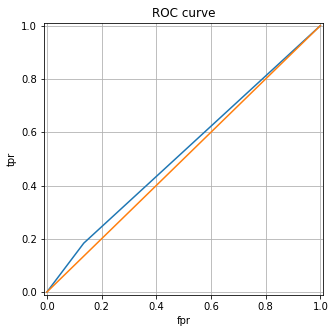

In [78]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [407]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict_proba(X_test)
predict

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

precision2 = precision_score(y_test, predict)
recall2 = recall_score(y_test, predict)
accuracy2 = accuracy_score(y_test, predict)



In [80]:
print (precision2)
print (recall2)
print (accuracy2)

0.340425531915
0.0288288288288
0.875191591855


In [83]:
predict = rfc.predict_proba(X_test)

(-0.01, 1.01)

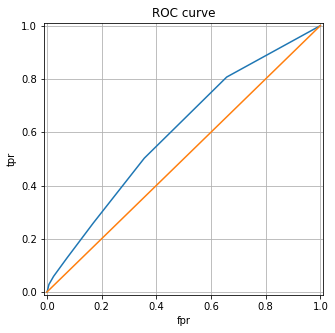

In [84]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [412]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict_proba(X_test)
predict

array([[ 1. ,  0. ],
       [ 0.6,  0.4],
       [ 0.7,  0.3],
       ..., 
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 0.9,  0.1]])

In [85]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

precision3 = precision_score(y_test, predict)
recall3 = recall_score(y_test, predict)
accuracy3 = accuracy_score(y_test, predict)

In [86]:
print (precision3)
print (recall3)
print (accuracy3)

0.285714285714
0.0036036036036
0.877819137289


In [87]:
predict = lr.predict_proba(X_test)

(-0.01, 1.01)

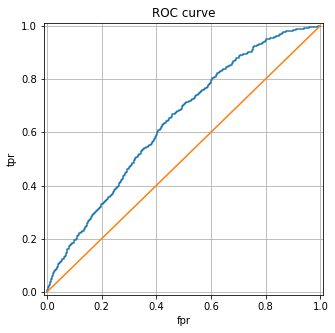

In [88]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [416]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict_proba(X_test)
predict

array([[ 0.84946403,  0.15053597],
       [ 0.85377973,  0.14622027],
       [ 0.86408377,  0.13591623],
       ..., 
       [ 0.86309792,  0.13690208],
       [ 0.86599334,  0.13400666],
       [ 0.8860268 ,  0.1139732 ]])

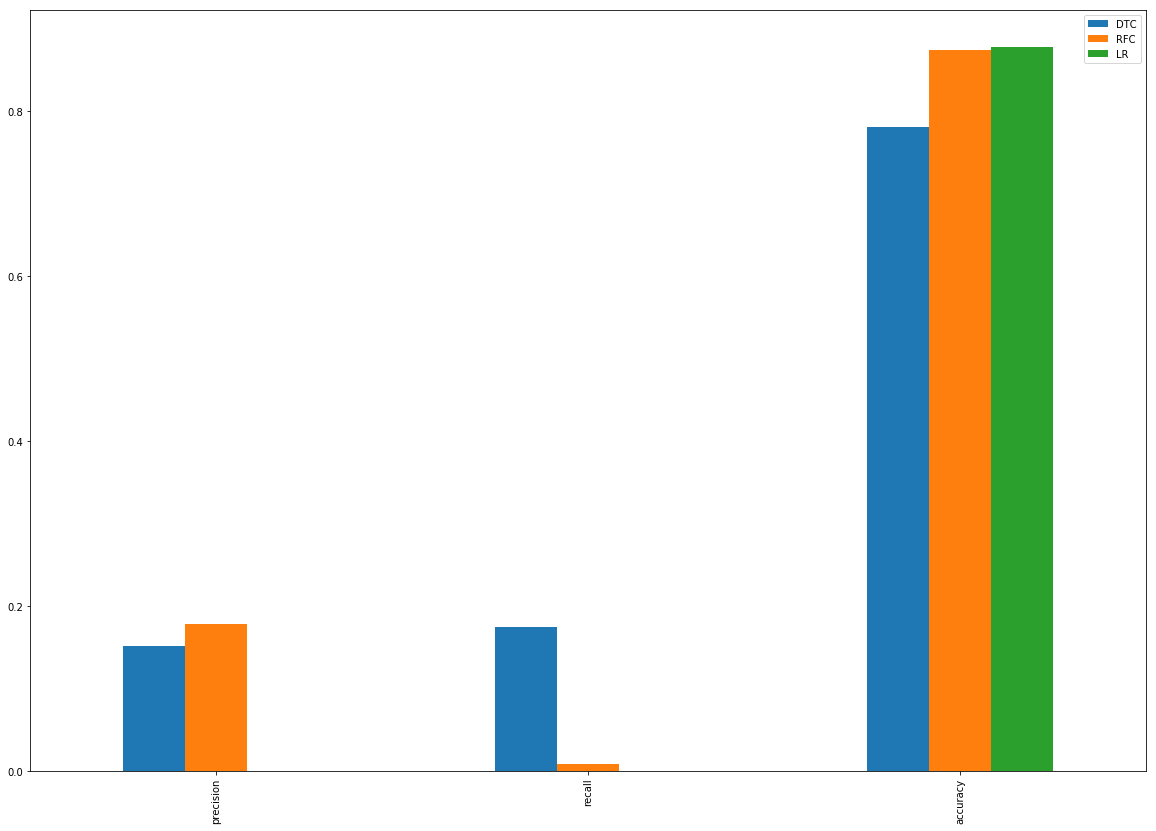

In [417]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
from matplotlib import pyplot as pl
%matplotlib inline

fig, ax = pl.subplots(figsize=(20,14))

fd = pd.DataFrame([[precision1, precision2, precision3],[recall1, recall2, recall3], [accuracy1, accuracy2, accuracy3]],
                 index=['precision', 'recall', 'accuracy'], columns=pd.Index(['DTC','RFC','LR'])).plot(kind='bar', ax=ax)

# Ваш код :-)

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)

In [93]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    train_new,
    y,
    scoring='roc_auc',
    cv=10
)
# Ваш код :-)

array([ 0.53505101,  0.50296031,  0.52882528,  0.51465675,  0.53129931,
        0.56563503,  0.52240226,  0.52635124,  0.53292669,  0.53851953])

In [94]:
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    train_new,
    y,
    scoring='roc_auc',
    cv=10
)


array([ 0.59820098,  0.58285804,  0.5971321 ,  0.62110201,  0.58158956,
        0.60298862,  0.54596224,  0.58958846,  0.61017588,  0.55263039])

In [95]:
lr = LogisticRegression()
cross_val_score(
    lr,
    train_new,
    y,
    scoring='roc_auc',
    cv=10
)


array([ 0.6472421 ,  0.61929346,  0.63606775,  0.6423754 ,  0.64900029,
        0.60904083,  0.64296456,  0.65908183,  0.63720898,  0.62816979])

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)
lr = LogisticRegression()
cross_val_score(
    lr,
    test_new,
    test_new['TARGET'],
    scoring='roc_auc',
    cv=10
)